# 1. Perkenalan

> Pada bagian ini akan diisi identitas, gambaran besar dataset, dan objektif yang ingin dicapai.

---
Milestone 2

Nama : Dwita Alya Windani

Batch : FTDS-RMT-024

Dataset : Behavioral Risk Factor Surveillance System 2015 from Kaggle ([Link](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv))

---

Latar Belakang Masalah:

Diabetes merupakan sebuah kondisi kesehatan kronis metabolik yang menyebabkan tubuh kesulitan untuk mengubah makanan (glukosa) menjadi energi. Hal ini menyebabkan kadar gula darah meningkat dan jika dibiarkan bisa menyebabkan kerusakan pada organ jantung, ginjal, pembuluh darah, dan syaraf. Diabetes dibagi menjadi 2 tipe yaitu tipe 1 yang disebabkan oleh genetik, dan tipe 2 yang disebabkan oleh gaya hidup.

Berdasarkan data dari International Diabetes Federation (IDF) pada tahun 2021, 10,8% orang dewasa dari total populasi di Indonesia menderita diabetes, artinya ada sekitar 19,5 juta kasus diabetes pada orang dewasa yang kasusnya terus meningkat dari tahun ke tahun. Diestimasikan akan ada 28,56 juta orang dewasa Indonesia yang terkena penyakit diabetes di tahun 2045.

Sumber:
- Data Diabetes Indonesia 2021: https://idf.org/our-network/regions-and-members/western-pacific/members/indonesia/
- Proyeksi Diabetes Indonesia 2045: https://www.diabetesatlas.org/data/en/country/94/id.html


Kasus:

Saya adalah seorang Data Scientist yang bekerja pada Kementerian Kesehatan Republik Indonesia yang fokus pada departemen penanganan penyakit kronis tidak menular.

Penetapan Tujuan Menggunakan Framework SMART:

- S: Menurunkan estimasi jumlah orang dewasa di Indonesia yang beresiko tinggi menderita diabetes tipe 2 dengan cara membuat aplikasi rekomendasi kesehatan yang memprediksi resiko diabetes dan memberikan saran pola hidup yang berdampak pada kesehatan.
- M: Menurunkan estimasi orang dewasa yang beresiko tinggi menderita diabetes sebanyak 25% dari data estimasi di 2045.
- A: Berdasarkan hasil prediksi resiko diabetes dan pemberian saran pola hidup yang berdampak pada kesehatan, penurunan 25% dari data estimasi tahun 2045 bisa dicapai.
- R: Melihat dari proyeksi angka penderita diabetes tahun 2045 aplikasi rekomendasi sangat krusial untuk membantu menurunkan jumlah estimasi orang dewasa Indonesia yang beresiko terkena diabetes.
- T: Tujuan di atas akan ditetapkan dalam waktu 2 tahun, atau bisa dievaluasi kembali pada tahun 2025.

Tujuan / Objective:

Menurunkan estimasi jumlah orang dewasa Indonesia yang beresiko tinggi menderita diabetes tipe 2 sebanyak 25% dari estimasi tahun 2045 dalam waktu 2 tahun dengan cara membuat aplikasi rekomendasi kesehatan yang memprediksi resiko diabetes dan pemberian saran pola hidup sehat.

# 2. Import Libraries

> Pada bagian ini akan diimport libraries yang akan digunakan pada program.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore') #turn off warning

# 3. Data Loading

> Pada bagian ini akan dilakukan loading dataset, pengecekan ukuran dataset, dan lain sebagainya.

##### Mengambil data dari Kaggle.

In [3]:
# #membuat direktori atau folder kaggle di root
# !mkdir ~/.kaggle

In [5]:
# !cp /content/kaggle.json ~/.kaggle/
# !ls ~/.kaggle

kaggle.json


In [7]:
# !chmod 600 /root/.kaggle/kaggle.json

In [8]:
# !kaggle datasets download -d cdc/behavioral-risk-factor-surveillance-system

behavioral-risk-factor-surveillance-system.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# !unzip /content/behavioral-risk-factor-surveillance-system.zip

Archive:  /content/behavioral-risk-factor-surveillance-system.zip
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2015_formats.json       


In [10]:
# # Display data Behavioural Risk Factor Surveillance System 2015
# filename = '2015.csv'
# df_brfss = pd.read_csv(filename)
# pd.set_option('display.max_columns', None)
# df_brfss.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [11]:
# # melihat ukuran dataset Behavioural Risk Factor Surveillance System 2015
# df_brfss.shape

(441456, 330)

##### Display dan Check Data Behavioural - Diabetes

Note:

Pemilihan kolom yang berkaitan dengan penyakit diabetes berdasarkan BRFSS codebook https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf disimpan pada file 'P1M2_dwita.csv'

In [2]:
# display data yang berhubungan dengan penyakit diabetes saja
df = pd.read_csv('P1M2_dwita.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,DIABETE3,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,SEX,_AGE65YR,MARITAL,EDUCA,INCOME2,WTKG3,HTM4,_BMI5,PREGNANT,DECIDE,_RFHYPE5,TOLDHI2,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,3.0,1.0,88.0,1.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,68.04,1.60,2657.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3.0,5.0,15.0,12.0,1.0,1.0,2.0,2.0,4.0,5.0,1.0,52.16,1.57,2103.0,NaN,1.0,2.0,2.0,2.0,1.0,9.0,9.0,9.0
2,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,3.0,4.0,2.0,93.89,1.68,3341.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,8.0,58.97,1.70,2036.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,3.0,3.0,88.0,88.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,73.94,1.57,2981.0,NaN,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0


In [3]:
# cek ukuran data
df.shape

(200000, 23)

In [4]:
# cek summary informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE3  199997 non-null  float64
 1   GENHLTH   200000 non-null  float64
 2   PHYSHLTH  199999 non-null  float64
 3   MENTHLTH  200000 non-null  float64
 4   CHECKUP1  199999 non-null  float64
 5   HLTHPLN1  200000 non-null  float64
 6   SEX       200000 non-null  float64
 7   _AGE65YR  200000 non-null  float64
 8   MARITAL   200000 non-null  float64
 9   EDUCA     200000 non-null  float64
 10  INCOME2   198527 non-null  float64
 11  WTKG3     185985 non-null  float64
 12  HTM4      193043 non-null  float64
 13  _BMI5     183485 non-null  float64
 14  PREGNANT  29680 non-null   float64
 15  DECIDE    194701 non-null  float64
 16  _RFHYPE5  200000 non-null  float64
 17  TOLDHI2   173133 non-null  float64
 18  _RFSMOK3  200000 non-null  float64
 19  _RFDRHV5  200000 non-null  float64
 20  _FRT

hasil pengamatan:
dari pengecekan untuk semua kolom bertipe data numerik, lalu masih banyak terdapat missing values, terutama di kolom PREGNANT 

In [5]:
# cek statistikal deskriptif
df.describe()

,DIABETE3,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,SEX,_AGE65YR,MARITAL,EDUCA,INCOME2,WTKG3,HTM4,_BMI5,PREGNANT,DECIDE,_RFHYPE5,TOLDHI2,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
count,199997.000000,200000.000000,199999.000000,200000.000000,199999.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,198527.000000,185985.000000,193043.000000,183485.000000,29680.000000,194701.000000,200000.000000,173133.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.757166,2.578730,60.681868,64.665335,1.575848,1.101150,1.57685,1.370290,2.268750,4.919365,20.287699,80.926622,1.694403,2804.963403,2.011152,1.941896,1.427370,1.631076,1.463490,1.515285,2.129985,2.106565,1.927860
std,0.723003,1.116323,37.046434,35.853408,1.251771,0.509588,0.49406,0.507806,1.693431,1.076489,31.878326,21.646455,0.105645,668.219810,0.587655,0.572166,0.645482,0.736713,1.585434,1.872256,2.322513,2.519609,2.204223
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,22.680000,0.910000,1221.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,15.000000,28.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,5.000000,65.770000,1.630000,2373.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,88.000000,88.000000,1.000000,1.000000,2.00000,1.000000,1.000000,5.000000,7.000000,77.560000,1.680000,2694.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,88.000000,88.000000,2.000000,1.000000,2.00000,2.000000,3.000000,6.000000,8.000000,90.720000,1.780000,3090.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,2.00000,3.000000,9.000000,9.000000,99.000000,280.000000,2.410000,9765.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [6]:
# mengubah kolom HTM4 dalam metrics centimeter
df['HTM4'] = df['HTM4'] * 100
df.head(2)

,DIABETE3,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,SEX,_AGE65YR,MARITAL,EDUCA,INCOME2,WTKG3,HTM4,_BMI5,PREGNANT,DECIDE,_RFHYPE5,TOLDHI2,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,3.0,1.0,88.0,1.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,68.04,160.0,2657.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3.0,5.0,15.0,12.0,1.0,1.0,2.0,2.0,4.0,5.0,1.0,52.16,157.0,2103.0,NaN,1.0,2.0,2.0,2.0,1.0,9.0,9.0,9.0


# 4. Exploratory Data Analysis (EDA)

> Pada bagian ini akan dilakukan eksplorasi data melalui data visualisasi, query-ing, atau grouping.

#### 4.a. Melakukan pengecekan pada persebaran usia di kolom _AGE65YR.

In [7]:
# cek unique values di kolom _AGE65YR
df['_AGE65YR'].value_counts()

_AGE65YR
1.0    128411
2.0     69120
3.0      2469
Name: count, dtype: int64

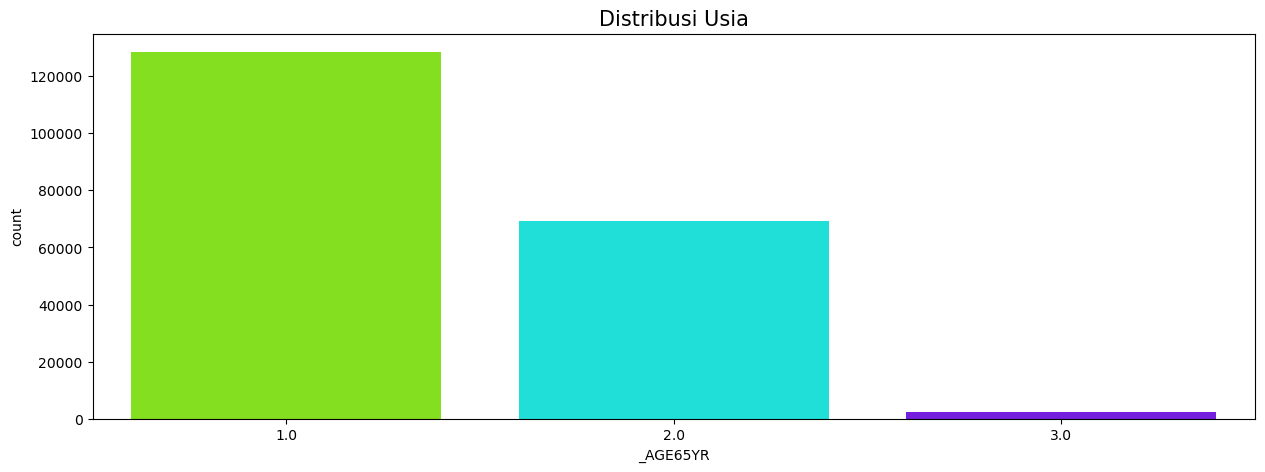

In [8]:
# visualisasi persebaran datanya
plt.figure(figsize=(15,5))
sns.countplot(x=df['_AGE65YR'], palette='hsv')
plt.title('Distribusi Usia', fontsize=15)
plt.show()

catatan:
- Value 1 = Age 18 to 64
- Value 2 = Age 65 or older
- Value 3 = Don’t know/Refused/Missing (Notes: 7 <= AGE <= 9)

Hasil Pengamatan:
- dari visualisasi dan perhitungan value unique-nya, kelompok usia 1 yaitu orang-orang yang berusia 18 sampai 64 di kolom Age adalah yang mayoritas pada datanya. 

Pada pemodelan ini hanya akan diambil kelompok usia 1 yaitu yang usianya 18 hingga 64 tahun saja.

#### 4.b. Eksplorasi Karakteristik Tinggi Badan, Berat Badan, BMI terhadap Penyakit Diabetes. 

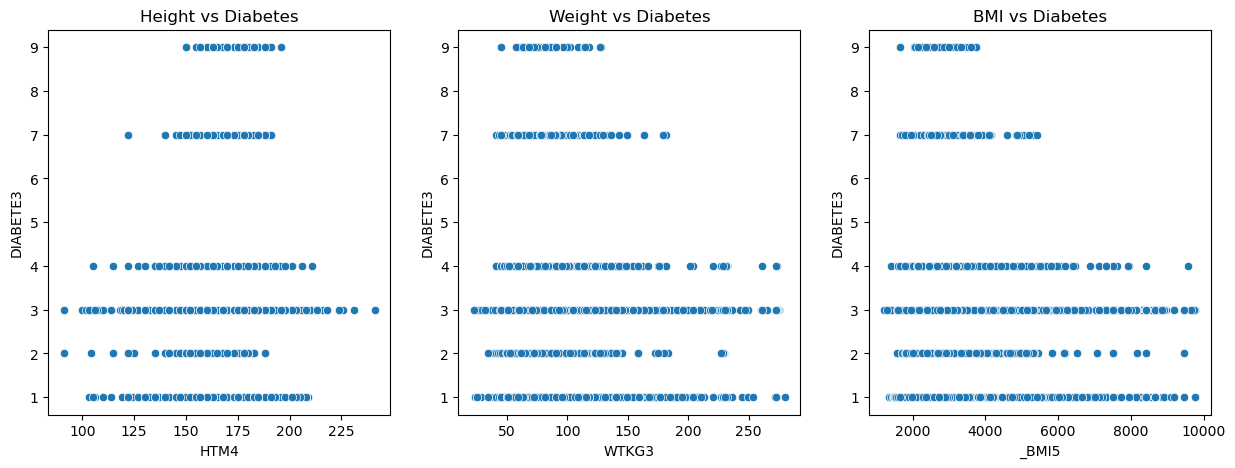

In [9]:
# visualisasi menggunakan scatterplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='HTM4', y='DIABETE3', data=df)
plt.title('Height vs Diabetes')

plt.subplot(1, 3, 2)
sns.scatterplot(x='WTKG3', y='DIABETE3', data=df)
plt.title('Weight vs Diabetes')

plt.subplot(1, 3, 3)
sns.scatterplot(x='_BMI5', y='DIABETE3', data=df)
plt.title('BMI vs Diabetes')

plt.show()

Hasil Pengamatan:
1. Height vs Diabetes:
    - berdasarkan tinggi badan dalam meter terhadap diagnosa diabetes, tidak ada korelasi khusus yang menunjukkan tinggi badan berpengaruh pada pengidap diabetes.
2. Weight vs Diabetes:
    - berdasarkan berat badan dalam kilogram terhadap diagnosa diabetes, tidak ditemukan adanya korelasi khusus yang menunjukkan berat badan berpengaruh pada pengidap diabetes.
3. BMI vs Diabetes:
    - berdasarkan BMI terhadap diagnosa diabetes, tidak ditemukan adanya korelasi khusus yang menunjukkan BMI berpengaruh pada pengidap diabetes.

#### 4.c. Eksplorasi Perilaku Merokok, Konsumsi Alkohol, Diet, dan Kebiasaan Olahraga terhadap Penyakit Diabetes. 

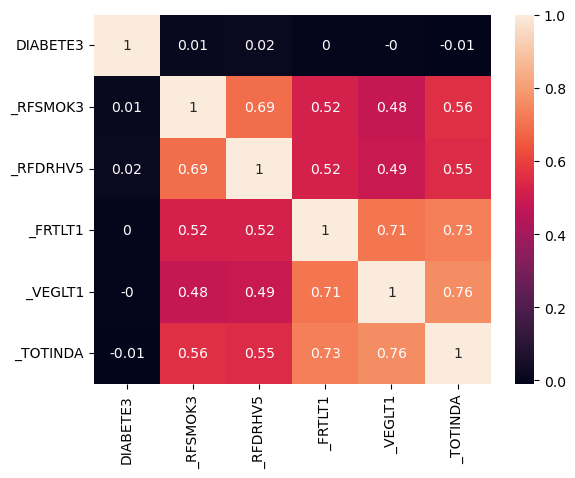

In [10]:
# visualisasi menggunakan heatmap untuk Perilaku vs Diagnosa Diabetes
corr_bhv = df[['DIABETE3','_RFSMOK3', '_RFDRHV5', '_FRTLT1', '_VEGLT1', '_TOTINDA']].corr().round(2)

sns.heatmap(corr_bhv,annot=True)
plt.show()

Hasil Pengamatan:
- Jika dilihat dari visualisasi heatmap, korelasi antara perilaku terhadap diagnosa diabetes tidak terlalu berpengaruh.

#### 4.d. Melihat persentase pengidap diabetes berdasarkan Gender.

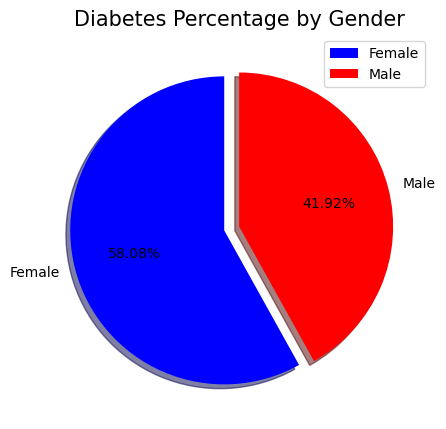

In [11]:
# visualisasi menggunakan pie chart
df_diabetes = df.query('DIABETE3 == 1 or DIABETE3 == 2')
labels = ['Female', 'Male']
size = df_diabetes['SEX'].value_counts()
colors = ['blue','red']
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(7,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%.2f%%')
plt.title('Diabetes Percentage by Gender', fontsize=15)
plt.legend()
plt.show()

Hasil Pengamatan:
- Berdasarkan hasil visualisasi, penderita diabetes terbanyak dari dataset dialami oleh perempuan dengan persentase 58,08%. Adapun laki-laki yang mengidap diabetes ada 41,92%
- Persentase diabetes yang diidap oleh perempuan ini juga bisa disebabkan oleh diabetes gestational yang dialami perempuan ketika sedang hamil.

#### 4.e. Melihat distribusi data dari tiap kolomnya.

IndexError: list index out of range

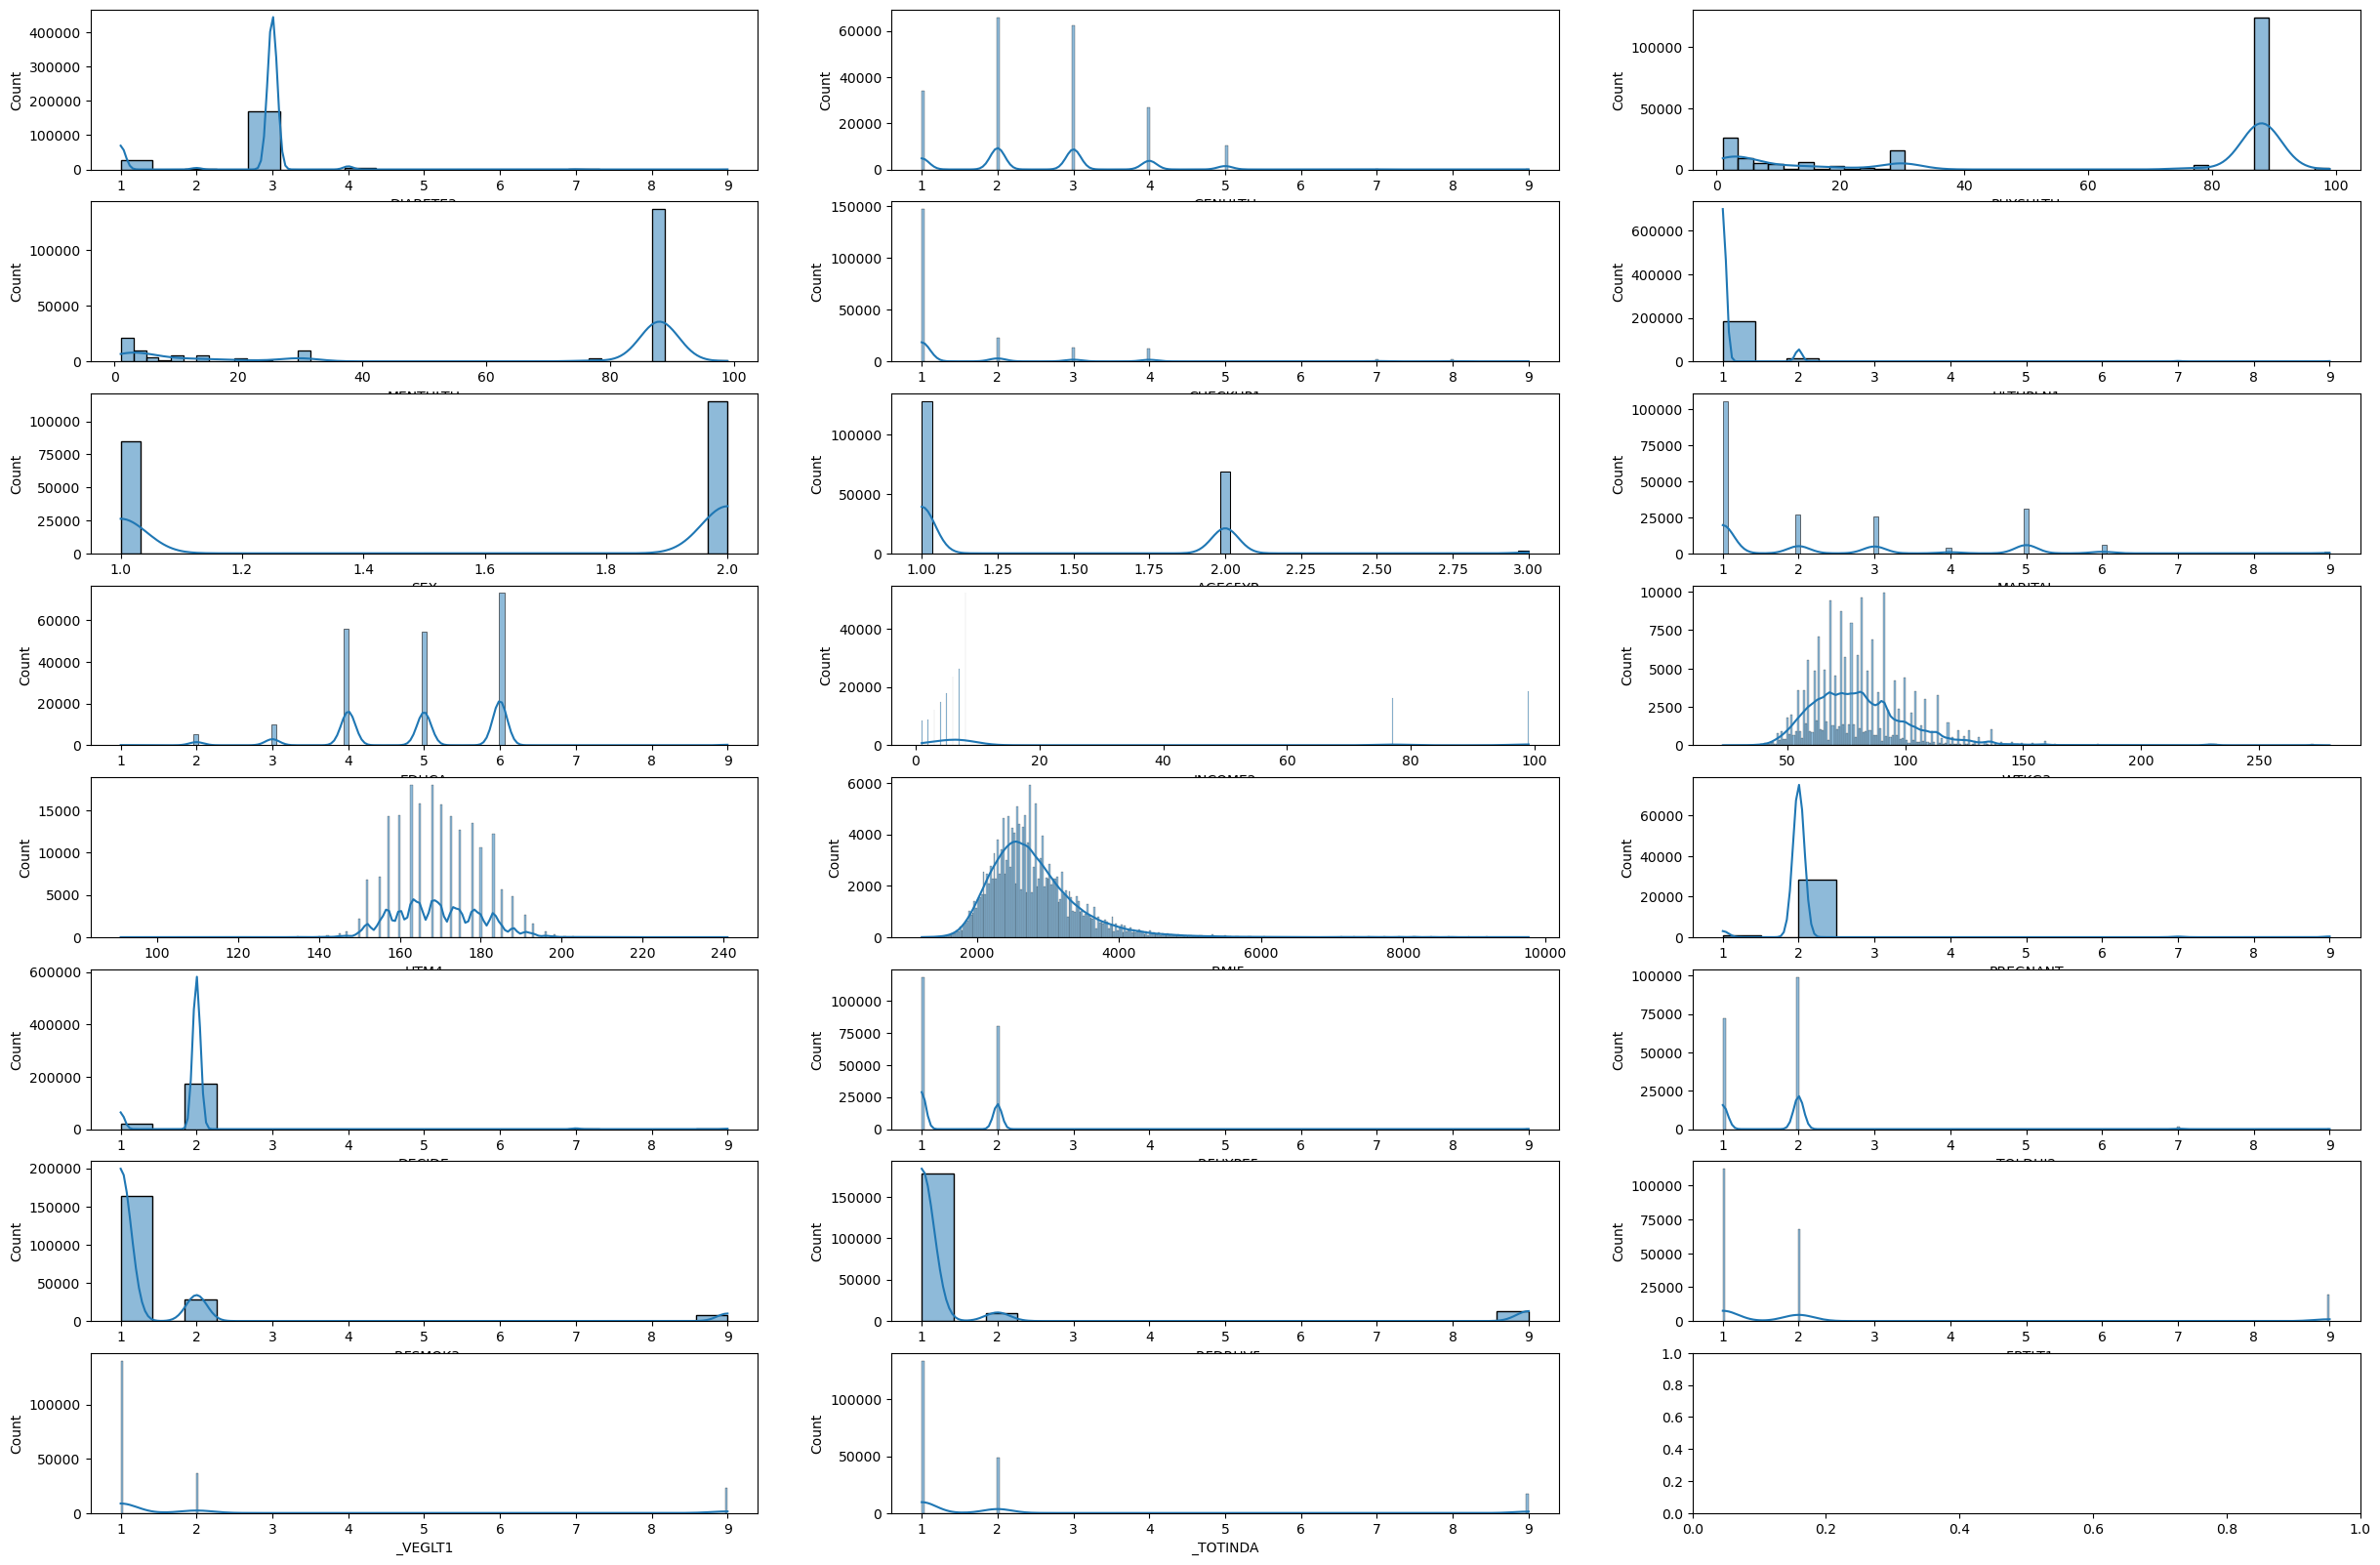

In [12]:
# pengecekkan dilakukan dengan menggunakan histplot
# set figure dan axes
fig = plt.figure(figsize=(30,20))
columns = df.columns.tolist()
nrows = 8
ncols = 3

# membuat histogram
for i in range (1, nrows*ncols+1):
    fig.add_subplot(nrows, ncols, i)
    sns.histplot(data=df, x=columns[i-1], kde=True)

# display histogram
plt.tight_layout()
plt.show()

Hasil Pengamatan:
- Berdasarkan pengamatan sekilas dari histogram, data diabetes dari dataset banyak yang tidak terdistribusi normal (distribusi skew) 

# 5. Feature Engineering

> Pada bagian ini akan dilakukan feature engineering berupa handling missing values, splitting dataset menjadi feature-label, splitting data train dan test, feature scaling.

In [13]:
# copy dataset
df_diab = df.copy()
df_diab.head()

,DIABETE3,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,SEX,_AGE65YR,MARITAL,EDUCA,INCOME2,WTKG3,HTM4,_BMI5,PREGNANT,DECIDE,_RFHYPE5,TOLDHI2,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,3.0,1.0,88.0,1.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,68.04,160.0,2657.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3.0,5.0,15.0,12.0,1.0,1.0,2.0,2.0,4.0,5.0,1.0,52.16,157.0,2103.0,NaN,1.0,2.0,2.0,2.0,1.0,9.0,9.0,9.0
2,1.0,3.0,88.0,88.0,1.0,1.0,2.0,1.0,3.0,4.0,2.0,93.89,168.0,3341.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,8.0,58.97,170.0,2036.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,3.0,3.0,88.0,88.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,73.94,157.0,2981.0,NaN,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0


#### 5.a. Pemilihan Kategori di dalam Label/Target Diabetes

remove value:
- 7 - Don’t know/Not Sure
- 9 - Refused
- BLANK - Not asked or Missing

In [14]:
# cek missing value DIABETE3
df_diab['DIABETE3'].isnull().sum()

3

In [15]:
# menghilangkan blank/missing value
df_diab.dropna(subset='DIABETE3', inplace=True)

In [16]:
# cek jumlah value 7 dan 9
df_diab['DIABETE3'].value_counts()

DIABETE3
3.0    168606
1.0     25979
4.0      3439
2.0      1623
7.0       262
9.0        88
Name: count, dtype: int64

In [17]:
# remove rows yang memiliki nilai DIABETE3 7 dan 9
df_diab.drop(df_diab[df_diab['DIABETE3'] > 6].index, inplace=True)

In [18]:
# cek kembali
df_diab['DIABETE3'].value_counts()

DIABETE3
3.0    168606
1.0     25979
4.0      3439
2.0      1623
Name: count, dtype: int64

#### 5.b. Handling Missing Values.

Handling Missing Values dengan cara remove rows untuk yang missing valuesnya sedikit.

In [19]:
# Cek Missing Values kembali
df_diab.isnull().sum()

DIABETE3         0
GENHLTH          0
PHYSHLTH         1
MENTHLTH         0
CHECKUP1         1
HLTHPLN1         0
SEX              0
_AGE65YR         0
MARITAL          0
EDUCA            0
INCOME2       1472
WTKG3        13931
HTM4          6895
_BMI5        16419
PREGNANT    170027
DECIDE        5281
_RFHYPE5         0
TOLDHI2      26787
_RFSMOK3         0
_RFDRHV5         0
_FRTLT1          0
_VEGLT1          0
_TOTINDA         0
dtype: int64

In [20]:
# remove 1 row berdasarkan kolom PHYSHLTH and CHECKUP1
df_diab.dropna(subset=['PHYSHLTH','CHECKUP1'], inplace=True)

Handling Missing Values untuk kolom yang jumlah missing valuesnya besar.

- Handling MAR (ditetapkan untuk data yang missing valuesnya di bawah 20000 atau di bawah 10% dari total data)

In [21]:
# Untuk data missing values yang berada di bawah 20000 akan dilakukan imputasi median
df_diab['INCOME2'].fillna(df_diab['INCOME2'].median(), inplace=True)
df_diab['WTKG3'].fillna(df_diab['WTKG3'].median(), inplace=True)
df_diab['HTM4'].fillna(df_diab['HTM4'].median(), inplace=True)
df_diab['_BMI5'].fillna(df_diab['_BMI5'].median(), inplace=True)
df_diab['DECIDE'].fillna(df_diab['DECIDE'].median(), inplace=True)

- Handling MNAR (untuk missing values di atas 20000 atau di atas 10% dari total data)

In [22]:
# Untuk data di Kolom PREGNANT dan TOLDHI2 akan dianggap sebagai value 9 atau refused (sesuai kode pada codebook)
df_diab['PREGNANT'].fillna(9, inplace=True)
df_diab['TOLDHI2'].fillna(9, inplace=True)

Catatan: Untuk kolom PREGNANT dan TOLDHI2 mengapa diisi dengan refused (value 9) karena missing value tadi dianggap sebagai jawaban subjek survey yang tidak mau menjawab pertanyaan tersebut.

#### 5.c. Split Data menjadi Train dan Test

- Split data menjadi X dan Y.

In [23]:
X = df_diab.drop(['DIABETE3'], axis=1)
y = df_diab['DIABETE3']
X.head()

,GENHLTH,PHYSHLTH,MENTHLTH,CHECKUP1,HLTHPLN1,SEX,_AGE65YR,MARITAL,EDUCA,INCOME2,WTKG3,HTM4,_BMI5,PREGNANT,DECIDE,_RFHYPE5,TOLDHI2,_RFSMOK3,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,1.0,88.0,1.0,1.0,1.0,2.0,1.0,1.0,6.0,7.0,68.04,160.0,2657.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.0,15.0,12.0,1.0,1.0,2.0,2.0,4.0,5.0,1.0,52.16,157.0,2103.0,9.0,1.0,2.0,2.0,2.0,1.0,9.0,9.0,9.0
2,3.0,88.0,88.0,1.0,1.0,2.0,1.0,3.0,4.0,2.0,93.89,168.0,3341.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,6.0,8.0,58.97,170.0,2036.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,3.0,88.0,88.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,73.94,157.0,2981.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0


- Split data menjadi train dan test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (139751, 22)
Test size  :  (59894, 22)


#### 5.d. Feature Scaling

In [26]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# 6. Model Definition

> Pada bagian ini akan berisi cell untuk mendefinisikan model ensemble learning menggunakan Random Forest, dan pencarian hyperparameter menggunakan GridsearchCV.

#### 6.a. Mencari Baseline Model

- Random Forest

In [27]:
# Baseline Model Menggunakan Random Forest
rf = RandomForestClassifier(n_estimators=100,
    max_depth=5,
    random_state=42)
rf.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [28]:
# Cek Performance Menggunakan f1 score
y_pred_train_rf = rf.predict(X_train_sc)
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_rf, average='weighted'), '\n')

F1 Score - Train Set  :  0.7747342881438095 



In [29]:
# Cross Validation
f1_train_cross_val = cross_val_score(rf,
                                     X_train_sc,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [nan nan nan]
F1 Score - Mean - Cross Validation :  nan
F1 Score - Std - Cross Validation  :  nan
F1 Score - Range of Test-Set       :  nan - nan


- Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier(max_depth=4, random_state=10)
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [40]:
# Train Decision Tree Evaluation
y_train_pred_dt = dt.predict(X_train_sc)
print('F1 Score  : ', f1_score(y_train, y_train_pred_dt, average='weighted'))
print('Recall  : ', recall_score(y_train, y_train_pred_dt, average='weighted'))

F1 Score  :  0.8069908760231432
Recall  :  0.8487023348670135


In [32]:
# Cross Validation
f1_train_cross_val = cross_val_score(dt,
                                     X_train_sc,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [nan nan nan]
F1 Score - Mean - Cross Validation :  nan
F1 Score - Std - Cross Validation  :  nan
F1 Score - Range of Test-Set       :  nan - nan


- KNN

In [33]:
# Training using KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
# Predict KNN
y_train_pred_knn = knn.predict(X_train_sc)
print('F1 Score:',f1_score(y_train, y_train_pred_knn, average='weighted'))

F1 Score: 0.8608673173141428


#### 6.b. Hyperparameter Tuning

In [57]:
# Hyperparameter Tuning Gridsearch untuk Decision Tree
n_estimators = [100,200,300]
max_depth = [1,3,5,7]
random_state = [10,20,30]

param_rf = {'n_estimators': n_estimators,
'max_depth': max_depth,
'random_state': random_state
}

gs_rf = GridSearchCV(estimator=rf,
                     param_grid=param_rf,
                     verbose=0)

gs_rf.fit(X_train_sc,y_train)

KeyboardInterrupt: 

- Akan digunakan Baseline Decision Tree karena f1 score dan recall cukup bagus dan juga cepat.

In [42]:
# Hyperparameter Tuning Gridsearch untuk Decision Tree
criterion = ['gini', 'entropy']
max_depth = [1,3,5,7]
random_state = [10,20,30]

param_dt = {'criterion': criterion,
'max_depth': max_depth,
'random_state': random_state
}

gs_dt = GridSearchCV(estimator=dt,
                     param_grid=param_dt,
                     verbose=0)

gs_dt.fit(X_train_sc,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'random_state': [10, 20, 30]})

In [43]:
# Best Params
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'random_state': 10}

- Untuk Boosting akan digunakan KNN dengan hyperparameter yang dituning menggunakan GridSearchCV juga.

In [46]:
# Hyperparameter Tuning Gridsearch CV untuk KNN
param_knn = {'n_neighbors':[1, 5, 7]}
gs_knn = GridSearchCV(estimator = knn,  
                           param_grid = param_knn,
                           cv=3,
                           verbose=2)

gs_knn.fit(X_train_sc, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[CV] END ......................................n_neighbors=1; total time= 2.9min
[CV] END ......................................n_neighbors=1; total time= 2.4min
[CV] END ......................................n_neighbors=1; total time= 2.9min
[CV] END ......................................n_neighbors=5; total time= 2.4min
[CV] END ......................................n_neighbors=5; total time= 2.4min
[CV] END ......................................n_neighbors=5; total time= 1.8min
[CV] END ......................................n_neighbors=7; total time= 1.8min
[CV] END ......................................n_neighbors=7; total time= 1.7min
[CV] END ......................................n_neighbors=7; total time= 1.7min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [1, 5, 7]}, verbose=2)

In [47]:
# Best Params
gs_knn.best_params_

{'n_neighbors': 7}

# 7. Model Training

> Pada bagian ini akan dilakukan training pada data yang sudah di-split berdasarkan model/algoritma yang sudah dipilih sebelumnya beserta analisis hasil training.

Baseline Model Menggunakan Decision Tree

In [49]:
pipe_dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dec_tree', DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 10))])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dec_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=10))])

In [50]:
# Bagging menggunakan Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(pipe_dt,
    n_estimators=100,
    random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                            ('dec_tree',
                                             DecisionTreeClassifier(criterion='entropy',
                                                                    max_depth=5,
                                                                    random_state=10))]),
                  n_estimators=100, random_state=42)

# 8. Model Evaluation

> Pada bagian ini akan dilakukan evaluasi terhadap model yang sudah dibuat berdasarkan algoritma yang sudah dipilih.

In [52]:
# Model Evaluation

y_train_pred = bag_clf.predict(X_train)
y_test_pred = bag_clf.predict(X_test)

print('F1 Score - Train - Bagging : ', f1_score(y_train, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - Bagging :  0.8002694929020622
F1 Score - Test - Bagging  :  0.8007847744941297


# 9. Model Saving

> Pada bagian ini akan dilakukan penyimpanan model dan file-file lain yang terkait dengan hasil pembuatan model.

In [54]:
# save
import pickle

with open('model.pkl', 'wb') as file_1:
  pickle.dump(bag_clf, file_1)

# 10. Kesimpulan

> Pada bagian terakhir akan diisi kesimpulan yang mencerminkan hasil yang sudah didapatkan dengan objective yang sudah dituliskan di bagian perkenalan.

Kesimpulan:

Berdasarkan hasil pemodelan, didapatkan F1 Score 80% untuk train dan test. Hal ini cukup bagus dan bisa dijadikan jaminan bahwa model cukup akurat untuk memprediksi resiko orang dewasa apakah beresiko diabetes atau tidak.

Conceptual Problem:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging adalah metode untuk memperbaiki hasil dari algoritma klasifikasi machince learning dengan menggabungkan beberapa model klasifikasi.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random forest adalah algoritma yang digunakan untuk pengklasifikasian dimana cara kerjanya adalah menggabungkan tree dalam decision tree.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation adalah teknik untuk mengevaluasi hasil pengujian model/algoritma.
